In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
diabetes_DS = pd.read_csv('data/diabetes.csv')

In [4]:
diabetes_DS.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_DS.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_DS.shape

(768, 9)

In [7]:
diabetes_DS['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 - Non-Diabetic \
1 - Diabetic

In [8]:
df = diabetes_DS.groupby('Outcome').mean().T

In [9]:
df

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


This formula calculates the percentage difference between values in columns labeled 0 and 1 in the DataFrame 'df'. The result is then stored in a new column labeled '%diff'. This formula is commonly used to measure the relative difference between two values.

In [12]:
df['%diff'] = (abs(df[0] - df[1] )/ ((df[0] + df[1])/2)) *100

In [13]:
df

Outcome,0,1,%diff
Pregnancies,3.298000,4.865672,38.406044
Glucose,109.980000,141.257463,24.898725
BloodPressure,68.184000,70.824627,3.799227
SkinThickness,19.664000,22.164179,11.954520
Insulin,68.792000,100.335821,37.301753
BMI,30.304200,35.142537,14.785572
DiabetesPedigreeFunction,0.429734,0.550500,24.640239
Age,31.190000,37.067164,17.220651


In [14]:
data = diabetes_DS.drop(columns= 'Outcome', axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

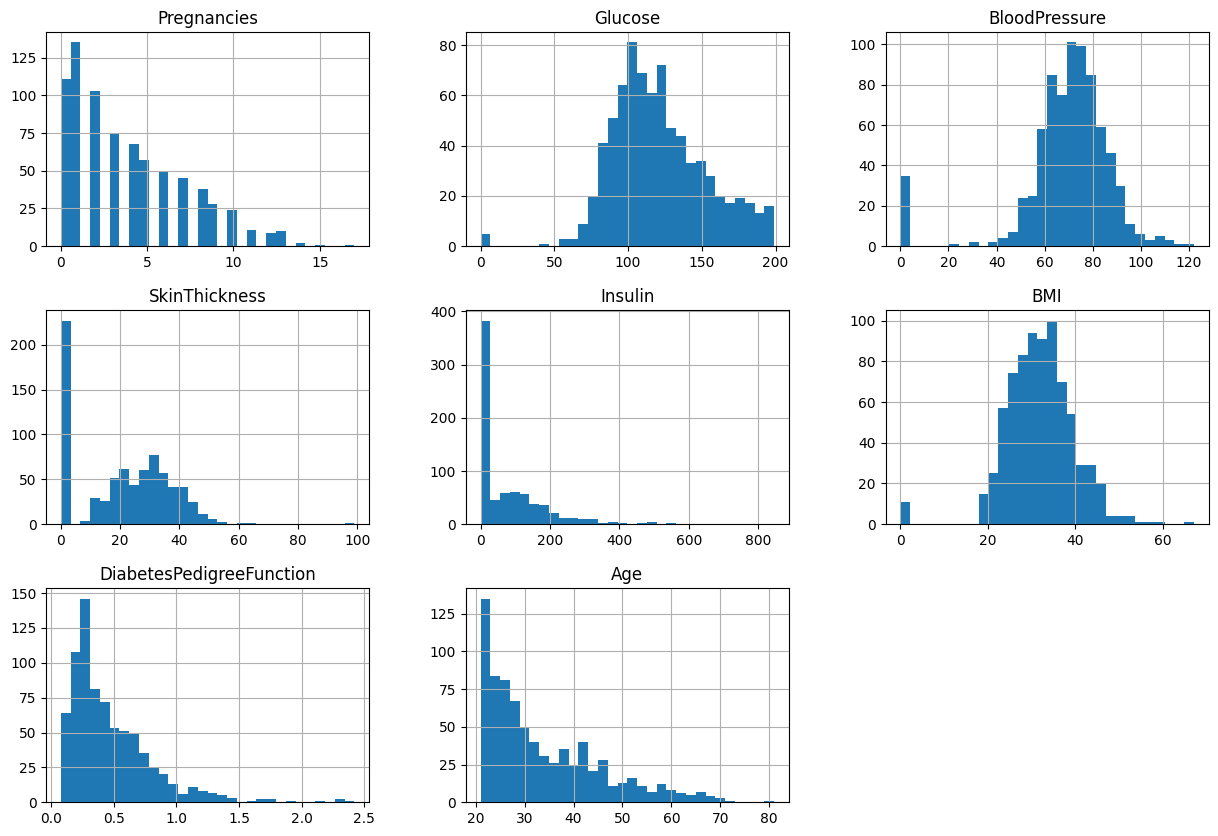

In [17]:
data.hist(bins=30, figsize=(15,10))
plt.show()

<Axes: >

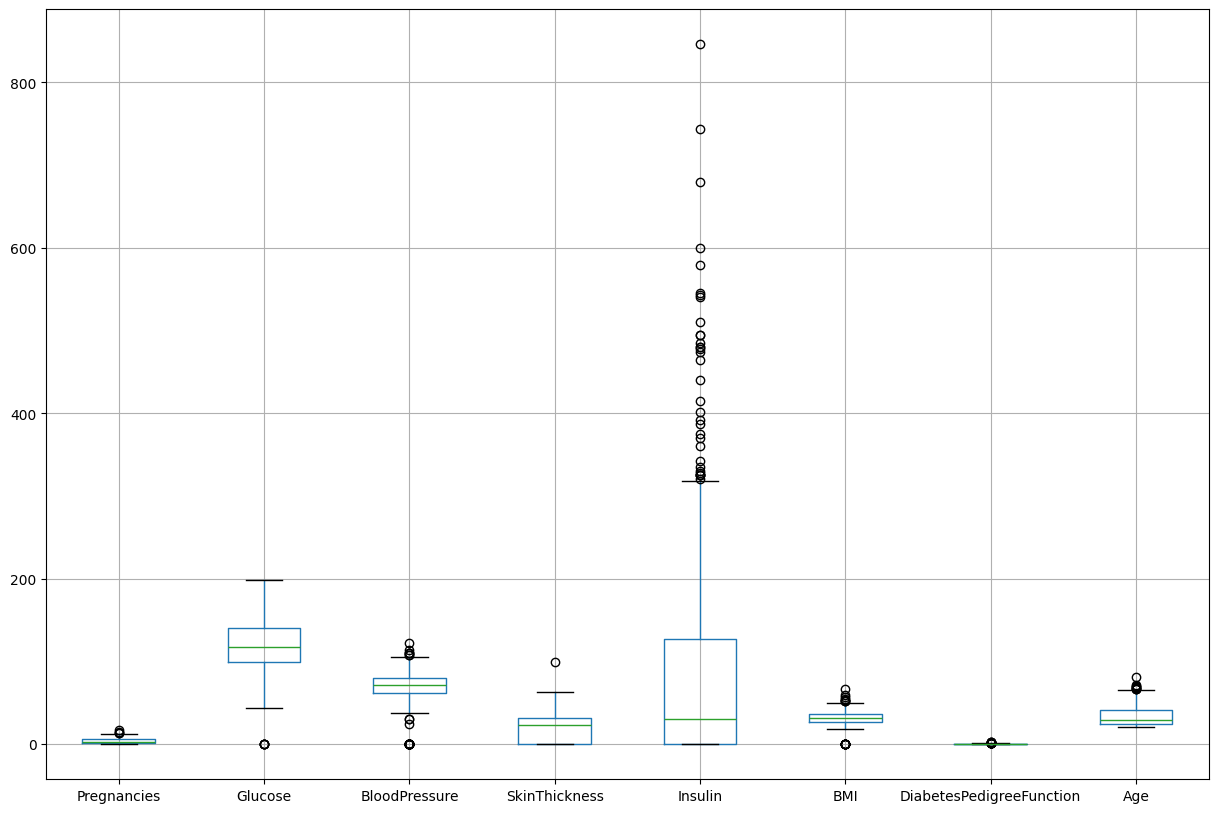

In [18]:
data.boxplot(figsize=(15,10))

In [20]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

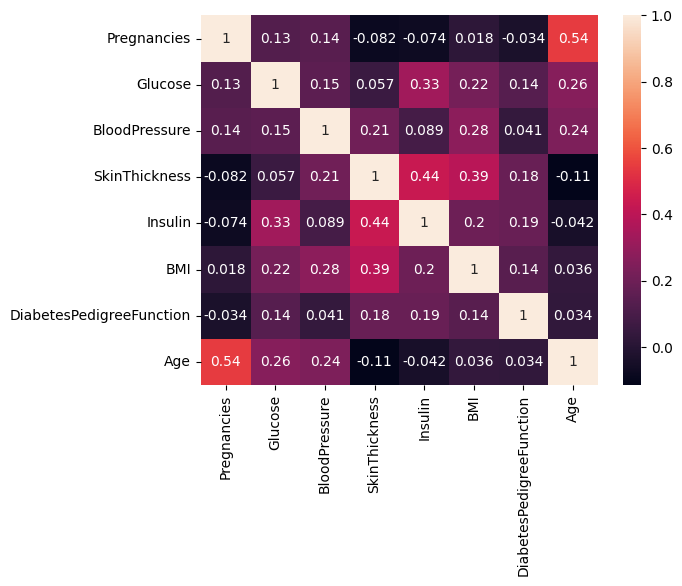

In [21]:
sns.heatmap(corr_matrix, annot= True)

In [22]:
X = data
Y = diabetes_DS['Outcome']

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64